# Life Expectancy By Country
Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load Data from CSV 

data = pd.read_csv('country_data.csv')

# To begin, let’s get a sense of what this data looks like.

print(data.head())

               Country  Life Expectancy          GDP
0          Afghanistan         58.19375   340.015425
1              Albania         75.15625  2119.726679
2              Algeria         73.61875  2847.853392
3               Angola         49.01875  1975.143045
4  Antigua and Barbuda         75.05625  9759.305728


In [3]:
# Let’s isolate the column that contains the life expectancy and store it in a variable named life_expectancy.

life_expectancy = data['Life Expectancy']
print(life_expectancy.head())

0    58.19375
1    75.15625
2    73.61875
3    49.01875
4    75.05625
Name: Life Expectancy, dtype: float64


----
# Find the Quantiles
We can now use NumPy functions on that column! Let’s use the np.quantile() function.


In [5]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


---
### Histogram
The narrowest quartile is between 72 and 75 years. We can see this above by printing **life_expectancy_quartiles**  let see by  **histogram** how it will graph larger spike of data around 75.

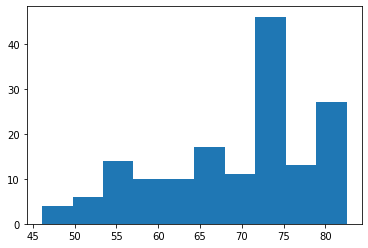

In [6]:
plt.hist(life_expectancy)
plt.show()

---
# Splitting the Data by GDP
#### GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.
Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

In [7]:
gdp = data['GDP']
print(gdp.head())

0     340.015425
1    2119.726679
2    2847.853392
3    1975.143045
4    9759.305728
Name: GDP, dtype: float64


In [8]:
# Creating Median GDP, 

median_gdp = np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781155


In [12]:
# lets now create low GDP and high GDP.

low_gdp = data[data['GDP'] < median_gdp]
print(low_gdp)

         Country  Life Expectancy          GDP
0    Afghanistan         58.19375   340.015425
1        Albania         75.15625  2119.726679
2        Algeria         73.61875  2847.853392
3         Angola         49.01875  1975.143045
6        Armenia         73.40000  1999.986318
..           ...              ...          ...
151      Ukraine         69.93750  1577.293329
154   Uzbekistan         68.03125   651.092359
155      Vanuatu         71.38750  2000.245518
156       Zambia         53.90625   811.811841
157     Zimbabwe         50.48750   410.980194

[79 rows x 3 columns]


In [13]:
high_gdp = data[data['GDP'] > median_gdp]
print(high_gdp)

                  Country  Life Expectancy           GDP
4     Antigua and Barbuda         75.05625   9759.305728
5               Argentina         75.15625   6998.575103
7               Australia         81.81250  34637.565050
8                 Austria         81.48125  33827.476310
9              Azerbaijan         70.73125   3302.947807
..                    ...              ...           ...
146   Trinidad and Tobago         71.06875   7741.748090
147               Tunisia         74.35625   3044.081488
148                Turkey         73.91250   3983.917722
152  United Arab Emirates         75.70000  22110.366990
153               Uruguay         76.07500   7192.584875

[79 rows x 3 columns]


In [15]:
# Find the quartiles of the "Life Expectancy" column of low_gdp

low_gdb_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdb_quartiles)

[56.3375  64.34375 71.7375 ]


In [16]:
# Find the quartiles of the "Life Expectancy" column of high_gdp

high_gdb_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(high_gdb_quartiles)

[72.965625 75.15625  80.521875]


---
# Histogram and Conclusions

By looking at the quantiles, you should get a sense of the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.

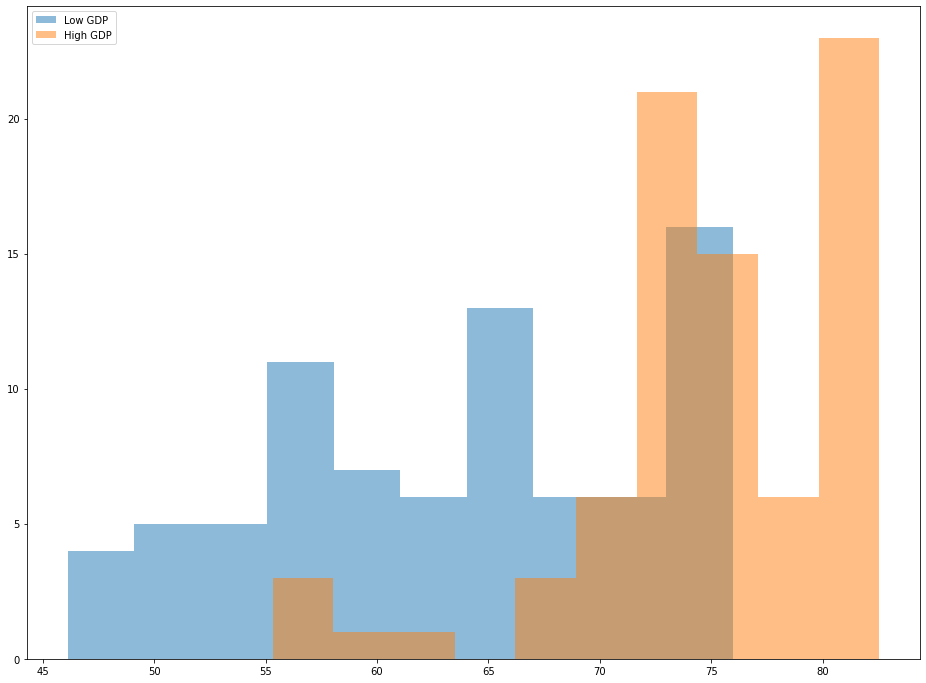

In [19]:
plt.figure(figsize=(16,12))
plt.hist(low_gdp['Life Expectancy'], alpha=0.5, label='Low GDP')
plt.hist(high_gdp['Life Expectancy'], alpha=0.5, label='High GDP')
plt.legend()
plt.show()

---
# We can now truly see the impact GDP has on life expectancy.